#**INTRODUCTION**

Telco Churn company, is a  company that offers telco services to the customers. Customers have been leaving and this analysis intends to explore the features that has an influence on churning.

#About the Data set:
* **Customers who left within the last month** – the column is called Churn
* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* **Customer account information**  – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* **Demographic info about customers** – gender, age range, and if they have partners and dependents

#Importing libraries

In [25]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Reading dataset

In [26]:
df=pd.read_csv("/Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Exploration

In [62]:
#Summary viewing
df.describe().round(2).style.format(precision=2).background_gradient(cmap="Blues")

,tenure,MonthlyCharges,TotalCharges,Churn_N
count,7032.00,7032.00,7032.00,7032.00
mean,32.42,64.80,2283.30,0.27
std,24.55,30.09,2266.77,0.44
min,1.00,18.25,18.80,0.00
25%,9.00,35.59,401.45,0.00
50%,29.00,70.35,1397.48,0.00
75%,55.00,89.86,3794.74,1.00
max,72.00,118.75,8684.80,1.00


In [28]:
#Viewing dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [64]:
# Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_N             0
dtype: int64

In [65]:
# Checking for duplicates
df.duplicated().sum()

0

In [29]:
df['SeniorCitizen'].unique()

array([0, 1])

0===> NO
1===> YES

Convert SeniorCitizen values
* 1: 'YES'
* O: 'NO'

In [32]:
df['SeniorCitizen']=df['SeniorCitizen'].replace(1, 'YES')
df['SeniorCitizen']=df['SeniorCitizen'].replace(0, 'NO')

In [33]:
df['SeniorCitizen'].unique()

array(['NO', 'YES'], dtype=object)

In [66]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Correct the data type of 'TotalCharges'

In [34]:
#3 df['TotalCharges'].str.contains("").sum()
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')


In [35]:
df['TotalCharges'].isnull().sum()

11

* There are missing values here, a small ratio to the data size and they were lost completly at random, so dropping them will not affect the data analysis

In [36]:
df.dropna(subset=['TotalCharges'], inplace=True)

# EDA

In [37]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## What is the overall chunning rate?

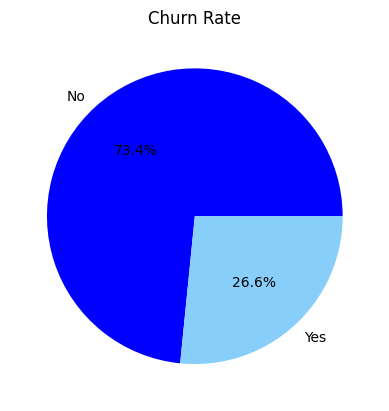

In [38]:
churn_rate=df['Churn'].value_counts()
churn_rate
plt.pie(churn_rate.values, labels=churn_rate.index, autopct='%1.1f%%', colors=["blue", "lightskyblue"])
plt.title('Churn Rate')
plt.show()

* Insight: Around a quarter of the customers left in last month

## What is the gender ration in the company?

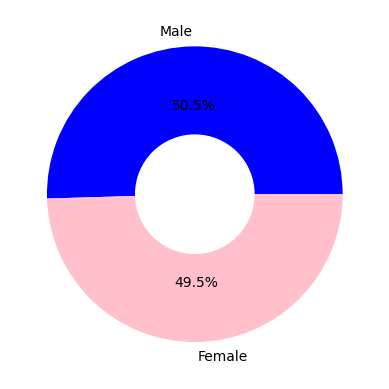

In [39]:
gender_rate=df['gender'].value_counts()
#create a pie chart
plt.pie(gender_rate.values, labels=gender_rate.index, colors=["blue", "pink"], autopct='%1.1f%%')
#ADD A CIRCLE AT THE CENTRE TO TRANSFORM IT TO DONUT CHART
my_circle=plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

* The gender ratio has a slight difference

## Is there a gender that is leaving at a higher rate than the other?

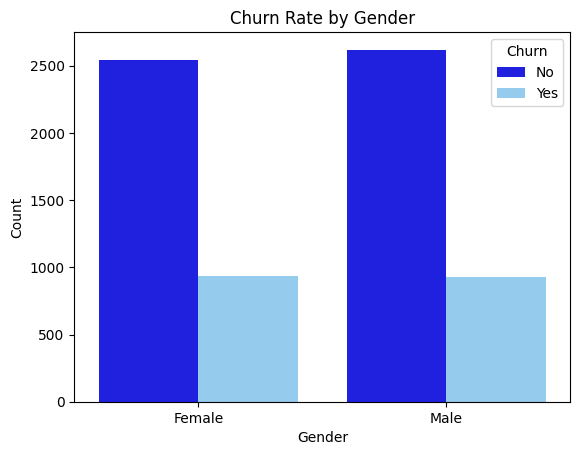

In [57]:
sns.countplot(x="gender", hue="Churn", palette=['blue',"lightskyblue"], data=df)
plt.title("Churn Rate by Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

* Insight: There is no specific gender leaving at higher rate than the other. hence Gender does not affect our churning rate

### Dose being a senior citizen influence the likelihood of churn?

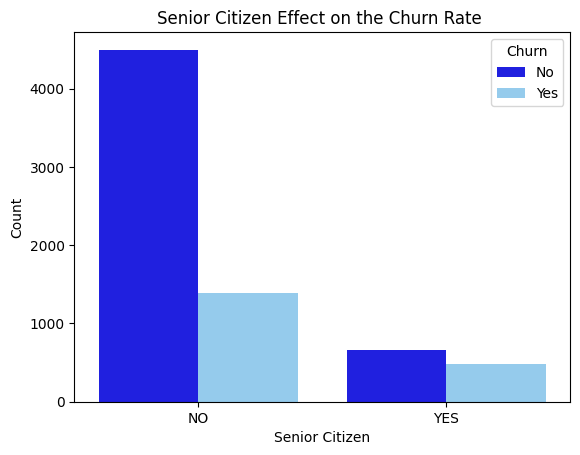

In [56]:
sns.countplot(x = "SeniorCitizen", hue="Churn", palette=['blue',"lightskyblue"], data= df)
plt.title("Senior Citizen Effect on the Churn Rate ")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()

* It can be noticed that even though the ratio of senior citizens among the customers is lower, the likelihood of churn is high for senior citizens compared to non-senior citizens, but there's also a high chance that some senior citizens won't churn,

### How much charges do the custmoers mostly pay?

Text(0.5, 1.0, 'TotalCharges Outliers')

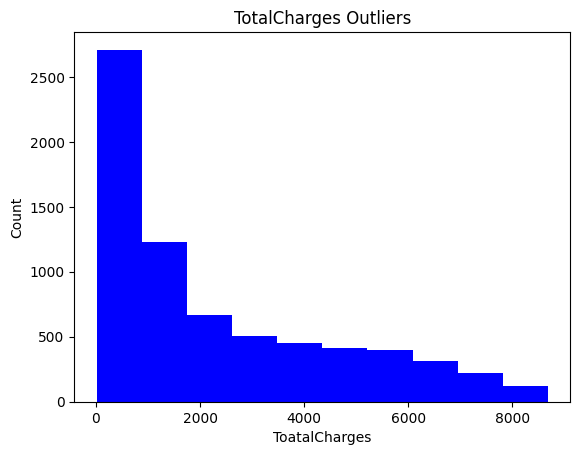

In [42]:
plt.hist(df['TotalCharges'], color="blue")
plt.xlabel('ToatalCharges')
plt.ylabel('Count')
plt.title('TotalCharges Outliers')

* Insight: It appears it has a skewed distribution which signifies that most of the customers pay less 2000. The number of customers decreases with increase in total cahrges

## Effects of customers having or not having a partiner on churn rate

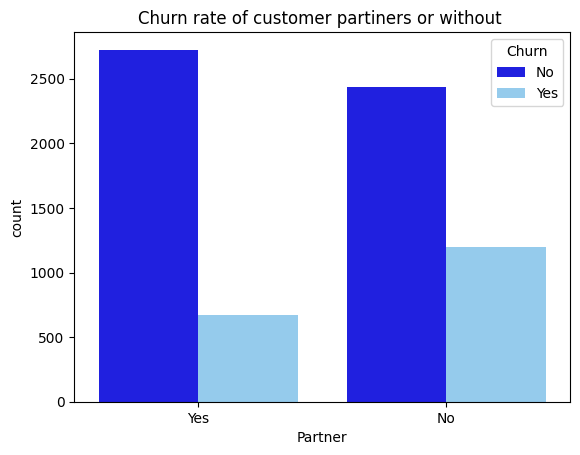

In [55]:
sns.countplot(x = "Partner", hue="Churn", palette=['blue',"lightskyblue"], data= df)
 ##sns.countplot(x = df['Dependent'], palette=['#432371',"#FAAE7B"]);
plt.title("Churn rate of customer partiners or without ")


plt.show()

* Insight: Despite the number of customer without a partner being lower than those with partners, their rate of channing is higher as comapred with those with a partiner.

## Does having dependents affect the churning rate?

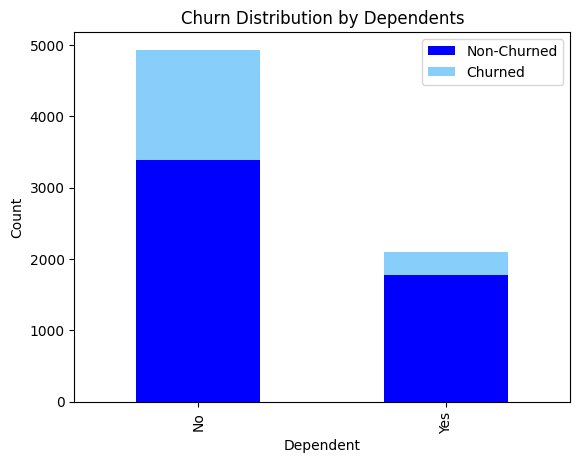

In [61]:
df_grouped=df.groupby(['Dependents', 'Churn']).size().unstack()
df_grouped.plot(kind='bar', color=["blue", "lightskyblue"], stacked=True)
plt.title("Churn Distribution by Dependents")
plt.xlabel("Dependent")
plt.ylabel("Count")
plt.legend(["Non-Churned", "Churned"])

* It's noted that most of our customers don't have dependents, and they also more likely to leave compared to customers with dependents

## Is there a correleation between tenure and churn rate?

In [45]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

<ipython-input-59-474a50b19fa0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "Churn", y="tenure",  palette=['blue',"lightskyblue"], data = df)


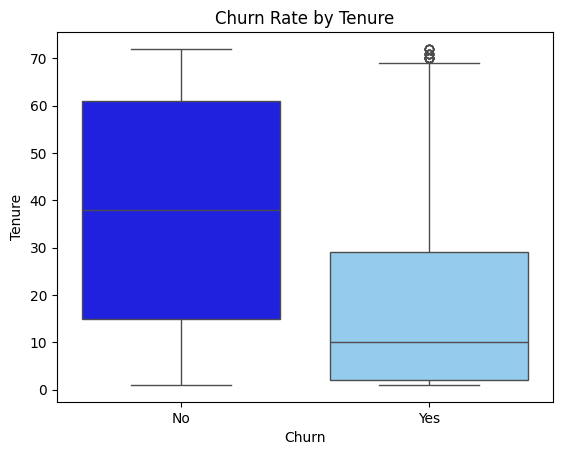

In [59]:
sns.boxplot(x= "Churn", y="tenure",  palette=['blue',"lightskyblue"], data = df)
plt.title("Churn Rate by Tenure")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

- It appears that The shorter the duration customers spend with the company  the higher their chances of churning

- The avarage tunre rate is about 10 years

## Dose the presence or absence of phone service impact churn behavior?

In [47]:
df["PhoneService"].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

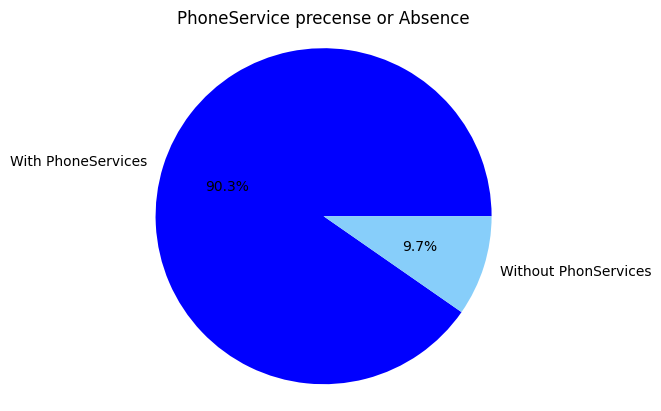

In [48]:
phone_values = df["PhoneService"].value_counts().values
labels = ["With PhoneServices", "Without PhonServices"]
sizes = [6352, 680]
plt.pie(sizes, labels= labels, colors=["blue", "lightskyblue"],   autopct="%1.1f%%")
plt.axis("equal")
plt.title("PhoneService precense or Absence")
plt.show()

- Based on the visualization the largest portion of our customers have phone services

- There is a fair ratio of the churn rate between having or not having the phone service, hence it is not the main effect of churning

## How dose having multiple lines or not affect the curn rate?

In [49]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

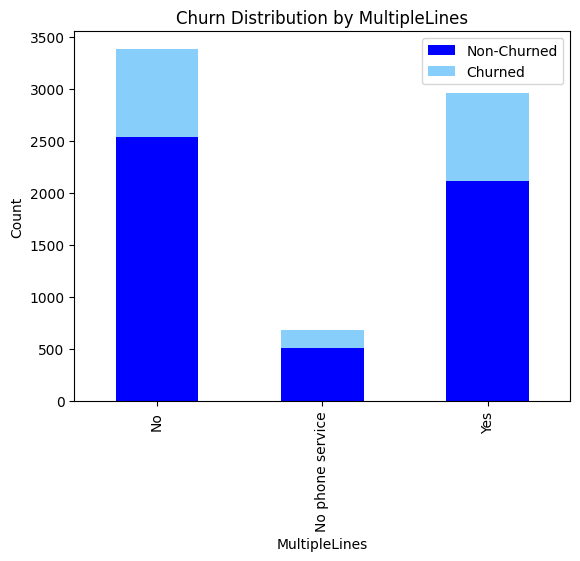

In [58]:
df_grouped = df.groupby(["MultipleLines", "Churn"]).size().unstack()
df_grouped.plot(kind= "bar", color=["blue", "lightskyblue"], stacked=True)
plt.title("Churn Distribution by MultipleLines")
plt.xlabel("MultipleLines")
plt.ylabel("Count")
plt.legend(["Non-Churned", "Churned"])

- The portion of the customers who have phone service but without multiple lines is a little bit higher than who have multiple lines
- some customers don't even have phone service to have mulitiple lines or not
- It appears that there's no significant diffference churning rate between customers with Multiple lines of the phone service and those without it

## Which internet Service Provider has the highest churn rate?

In [51]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Text(0.5, 1.0, 'Chur Rate by Internet Service')

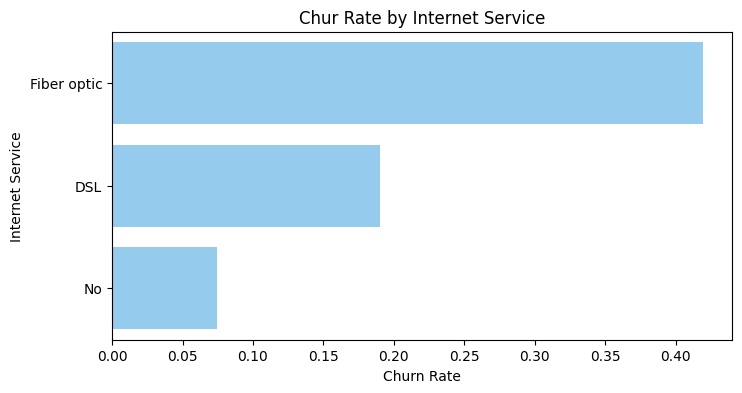

In [52]:
df["Churn_N"] = df["Churn"].map({"Yes":1, "No": 0})
internet_churn = df.groupby("InternetService")["Churn_N"].mean().reset_index()
internet_churn = internet_churn.sort_values("Churn_N", ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x="Churn_N", y="InternetService", data= internet_churn, color = "lightskyblue")
plt.xlabel("Churn Rate")
plt.ylabel("Internet Service")
plt.title("Chur Rate by Internet Service")

* Based on the visualization, it seems that the highest portion of churning customers were using Fiber Optic as an internet service provider

## Do customers with online security tend to churn less frequently?

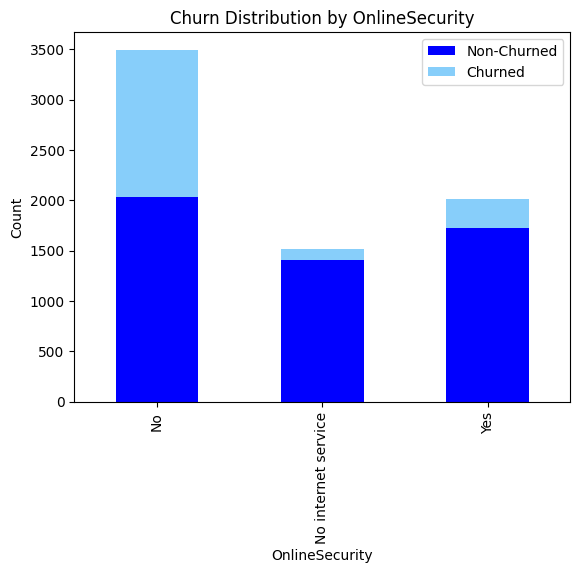

In [53]:
df_grouped = df.groupby(["OnlineSecurity", "Churn"]).size().unstack()
df_grouped.plot(kind= "bar", color=["blue", "lightskyblue"], stacked=True)
plt.title("Churn Distribution by OnlineSecurity")
plt.xlabel("OnlineSecurity")
plt.ylabel("Count")
plt.legend(["Non-Churned", "Churned"])

- The larger ratio of the customers don't have Online security service, and it appears that they tend to churn more than the customers with online security

# **Finding**

Features that have an influence on the churn rate:
- SeniorCitizen: yes
- Partner: no
- Dependents: no
- Tenure: low tenure
- InternetService: fiber optic
- OnlineSecurity: no

Features that don't have an influence on the churn rate:
- Gender
-PhoneService
- MultipleLines